'''
<br><br>
@Author: Shivraj Yelave<br>
@Date: 3-10-24<br>
@Last modified by: Shivraj Yelave<br>
@Last modified time: <br>
@Title: Simple Linear Regression Predict Aperent Temperature<br><br>
'''

### Import Libraries

In [81]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats


### Load Dataset

In [82]:
df = pd.read_csv('weatherHistory.csv')
df.head()


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


### Selecting Required Features

In [83]:
X = df['Humidity']
y=df['Apparent Temperature (C)']
print(X.head())
print(y.head())

0    0.89
1    0.86
2    0.89
3    0.83
4    0.83
Name: Humidity, dtype: float64
0    7.388889
1    7.227778
2    9.377778
3    5.944444
4    6.977778
Name: Apparent Temperature (C), dtype: float64


### Analyzing Dataset

In [84]:
print(X.describe())
print(y.describe())
print("X null values",X.isnull().sum())
print("y null values",y.isnull().sum())

count    96453.000000
mean         0.734899
std          0.195473
min          0.000000
25%          0.600000
50%          0.780000
75%          0.890000
max          1.000000
Name: Humidity, dtype: float64
count    96453.000000
mean        10.855029
std         10.696847
min        -27.716667
25%          2.311111
50%         12.000000
75%         18.838889
max         39.344444
Name: Apparent Temperature (C), dtype: float64
X null values 0
y null values 0


### Looking for outliers

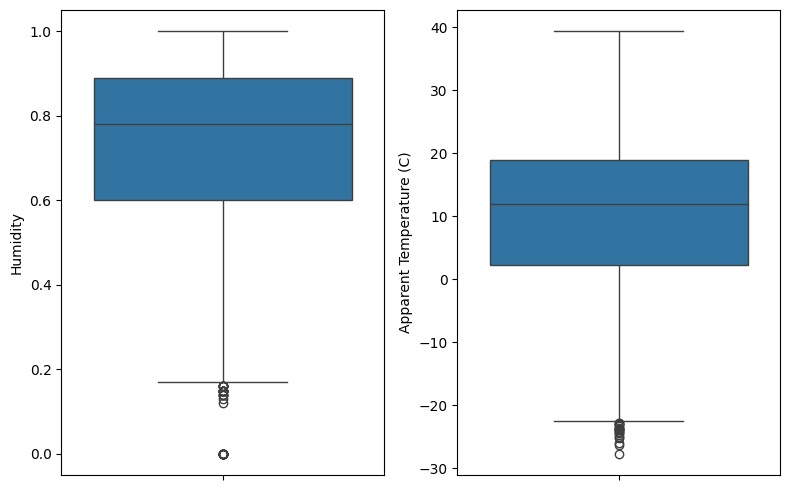

In [85]:
plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
sns.boxplot(data=X)

plt.subplot(1,2,2)
sns.boxplot(data=y)
plt.tight_layout()

plt.show()

### Removing Outliers

In [86]:
data = pd.DataFrame({'Humidity': X, 'Apparent Temperature (C)': y})

# Removing outliers using Z-score method
z_scores = np.abs(stats.zscore(data))
threshold = 3  # Setting the threshold for identifying outliers
data_no_outliers = data[(z_scores < threshold).all(axis=1)]

# Splitting the cleaned dataset into features and target variable
X_clean = data_no_outliers['Humidity'].values.reshape(-1, 1)
y_clean = data_no_outliers['Apparent Temperature (C)'].values

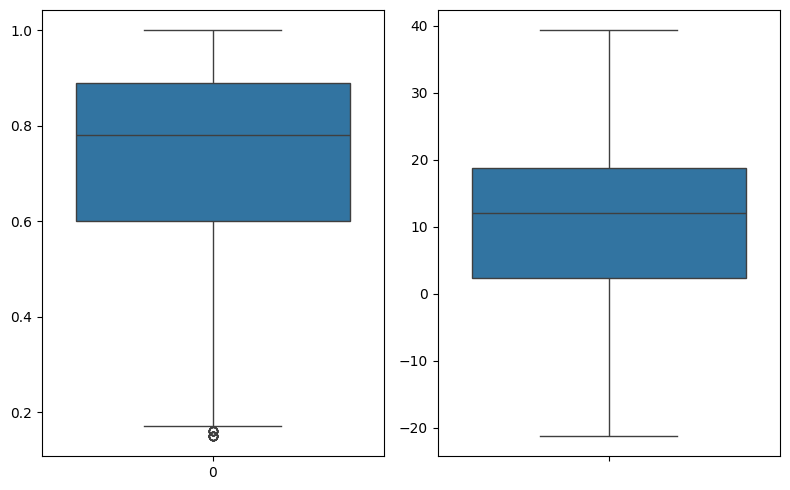

In [87]:
plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
sns.boxplot(data=X_clean)

plt.subplot(1,2,2)
sns.boxplot(data=y_clean)
plt.tight_layout()

plt.show()

### Spliting dataset

In [88]:
# Split the cleaned data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Check shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (77112, 1)
y_train shape: (77112,)
X_test shape: (19278, 1)
y_test shape: (19278,)


### Scaling Data

In [89]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [90]:
model = LinearRegression()
# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


### Model Performance

In [91]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 71.5544726681441
R^2 Score: 0.37123164951875987


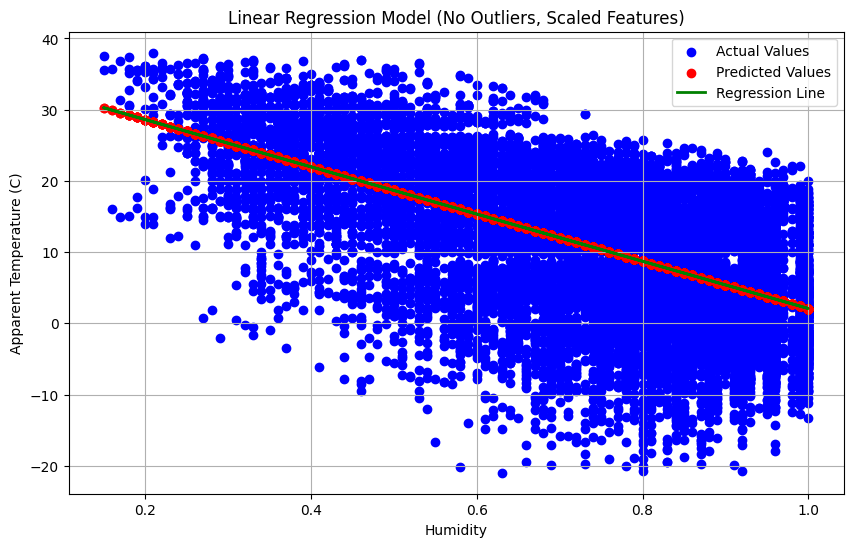

In [92]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Values')
plt.scatter(X_test, y_pred, color='red', label='Predicted Values')
plt.plot(X_test, y_pred, color='g', linewidth=2, label='Regression Line')
plt.title('Linear Regression Model (No Outliers, Scaled Features)')
plt.xlabel('Humidity')
plt.ylabel('Apparent Temperature (C)')
plt.legend()
plt.grid()
plt.show()